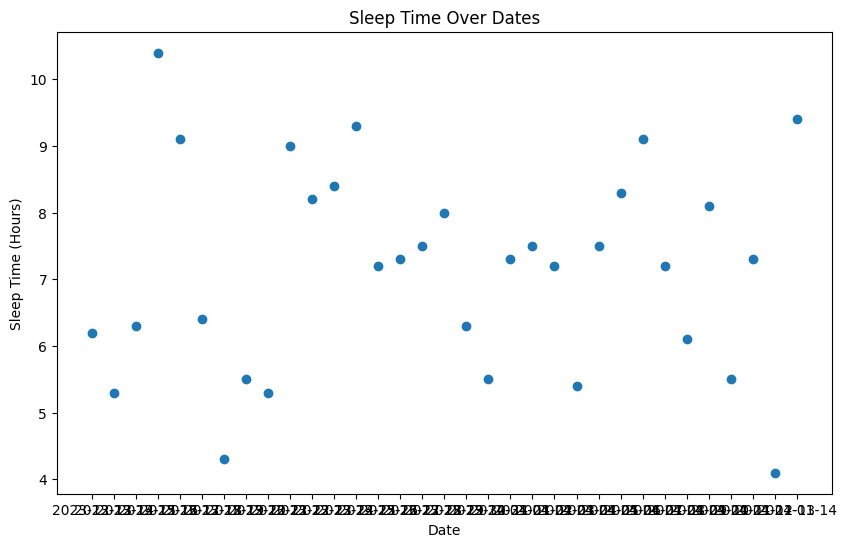

In [1]:
import sqlite3
import matplotlib.pyplot as plt

# データベースへの接続
conn = sqlite3.connect('./database.sqlite')
c = conn.cursor()

# データの取得
date_and_sleep_time_list = [data for data in c.execute('SELECT date, sleep_time FROM database')]
conn.close()

date_list = []
sleep_time_list = []

for date_str, sleep_time in date_and_sleep_time_list:
    date_str = date_str.replace("2023/12/","")
    date_str = date_str.replace("2024/01/","")
    date_list.append(date_str)  # 日付の文字列をdatetimeオブジェクトに変換
    sleep_time_list.append(sleep_time)

# Matplotlibでグラフをプロット
plt.figure(figsize=(10, 6))
plt.scatter(date_list, sleep_time_list, marker='o')  # 日付と睡眠時間をプロット
plt.xlabel('Date')
plt.ylabel('Sleep Time (Hours)')
plt.title('Sleep Time Over Dates')
# plt.gcf().autofmt_xdate()  # X軸の日付ラベルを斜めにして読みやすくする
# plt.grid(True)  # グリッドを表示
plt.show()

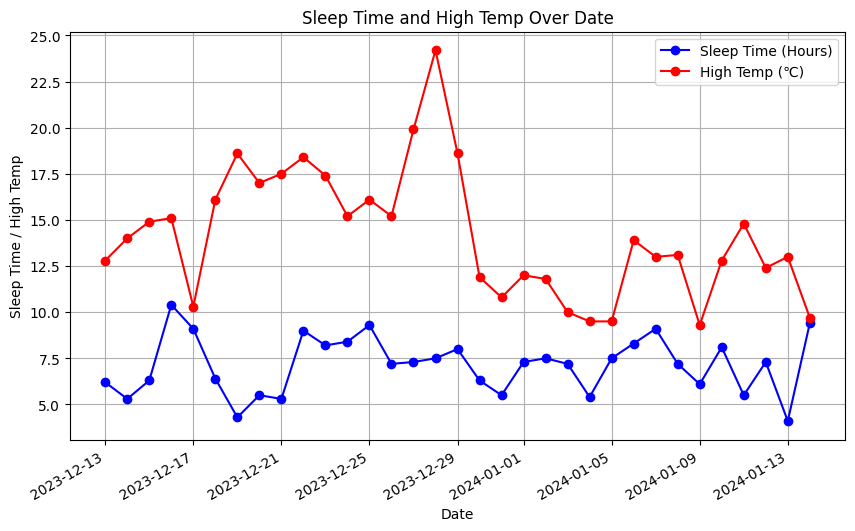

In [4]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# データベースへの接続
conn = sqlite3.connect('./database.sqlite')
c = conn.cursor()

# データの取得
date_and_sleep_time_and_high_temp_list = [data for data in c.execute('SELECT date, sleep_time, high_temp FROM database')]
conn.close()

# リストの初期化
date_list = []
sleep_time_list = []
high_temp_list = []

# データのリストへの格納
for date_str, sleep_time, high_temp in date_and_sleep_time_and_high_temp_list:
    # 日付の文字列をdatetimeオブジェクトに変換（フォーマットを '%Y-%m-%d' に修正）
    date_obj = datetime.strptime(date_str, '%Y-%m-%d') 
    date_list.append(date_obj)                         
    sleep_time_list.append(sleep_time)
    high_temp_list.append(high_temp)

# Matplotlibでグラフをプロット
plt.figure(figsize=(10, 6))

# 睡眠時間に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, sleep_time_list, label='Sleep Time (Hours)', color='blue', marker='o')

# 最高気温に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, high_temp_list, label='High Temp (℃)', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Sleep Time / High Temp')
plt.title('Sleep Time and High Temp Over Date')
plt.gcf().autofmt_xdate() 
plt.legend() 
plt.grid(True) 
plt.show() 